In [1]:
!pip install scikit-learn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
dataset=pd.read_csv(r'G:\machinelearning\employee_survey.csv')

In [50]:
dataset.head()
dataset.tail()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,Age Range
3020,2070,Male,47,Married,Lead,16,Marketing,Part-Time,1,3,...,Public Transport,15,8,28,8,Master,False,58.0,1,40-50
3021,2072,Female,47,Married,Lead,8,IT,Contract,3,1,...,Car,28,8,21,8,Master,True,54.0,1,40-50
3022,2145,Male,41,Married,Lead,17,IT,Full-Time,1,1,...,Public Transport,9,6,23,3,Master,True,58.5,1,40-50
3023,2168,Female,54,Married,Lead,16,IT,Full-Time,1,5,...,Public Transport,18,10,30,7,Master,True,58.0,1,50-60
3024,2183,Female,44,Married,Lead,22,Marketing,Full-Time,3,3,...,Car,10,7,29,4,PhD,False,61.0,1,40-50


In [49]:
dataset.size


0       2.5
1       1.8
2       2.1
3       1.9
4       3.7
       ... 
3020    1.9
3021    1.5
3022    1.3
3023    2.5
3024    1.1
Name: PhysicalActivityHours, Length: 3025, dtype: float64


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025 entries, 0 to 3024
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmpID                  3025 non-null   int64  
 1   Gender                 3025 non-null   object 
 2   Age                    3025 non-null   int64  
 3   MaritalStatus          3025 non-null   object 
 4   JobLevel               3025 non-null   object 
 5   Experience             3025 non-null   int64  
 6   Dept                   3025 non-null   object 
 7   EmpType                3025 non-null   object 
 8   WLB                    3025 non-null   int64  
 9   WorkEnv                3025 non-null   int64  
 10  PhysicalActivityHours  3025 non-null   float64
 11  Workload               3025 non-null   int64  
 12  Stress                 3025 non-null   int64  
 13  SleepHours             3025 non-null   float64
 14  CommuteMode            3025 non-null   object 
 15  Comm

In [17]:
dataset.isna().sum()

EmpID                    0
Gender                   0
Age                      0
MaritalStatus            0
JobLevel                 0
Experience               0
Dept                     0
EmpType                  0
WLB                      0
WorkEnv                  0
PhysicalActivityHours    0
Workload                 0
Stress                   0
SleepHours               0
CommuteMode              0
CommuteDistance          0
NumCompanies             0
TeamSize                 0
NumReports               0
EduLevel                 0
haveOT                   0
TrainingHoursPerYear     0
JobSatisfaction          0
dtype: int64

In [19]:
print(dataset.dtypes)

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
dtype: object


In [20]:
dataset.columns


Index(['EmpID', 'Gender', 'Age', 'MaritalStatus', 'JobLevel', 'Experience',
       'Dept', 'EmpType', 'WLB', 'WorkEnv', 'PhysicalActivityHours',
       'Workload', 'Stress', 'SleepHours', 'CommuteMode', 'CommuteDistance',
       'NumCompanies', 'TeamSize', 'NumReports', 'EduLevel', 'haveOT',
       'TrainingHoursPerYear', 'JobSatisfaction'],
      dtype='object')

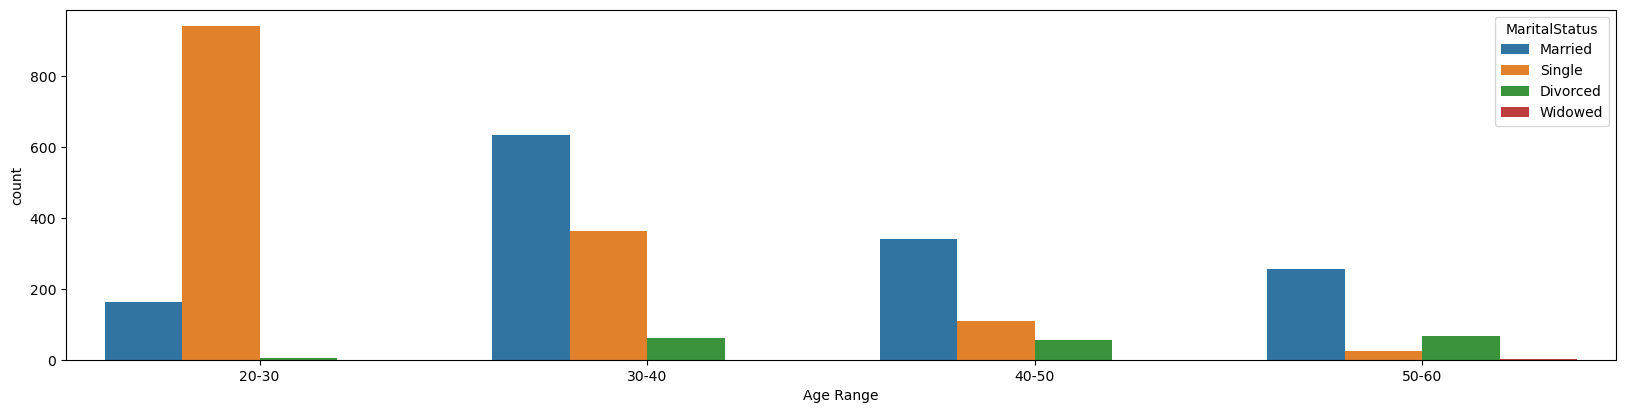

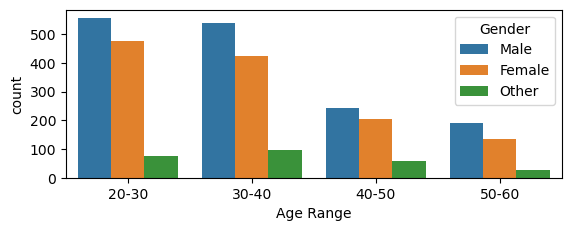

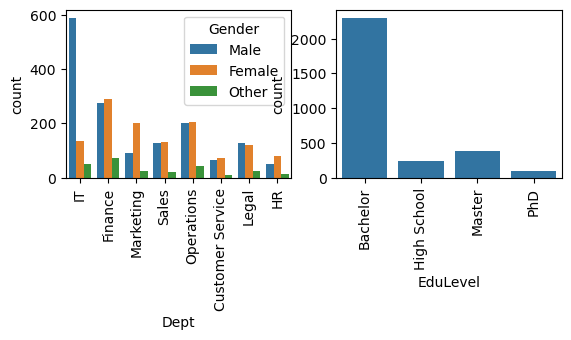

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
dataset['Age Range'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels)
sns.countplot(x='Age Range', hue='MaritalStatus', data=dataset)

plt.show()
plt.subplot(2,1,2)
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
dataset['Age Range'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels)
sns.countplot(x='Age Range', hue='Gender', data=dataset)

plt.show()

plt.subplot(2,2,1)
sns.countplot(x='Dept', hue='Gender', data=dataset)

plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x='EduLevel', data=dataset)

plt.xticks(rotation=90)



plt.show()

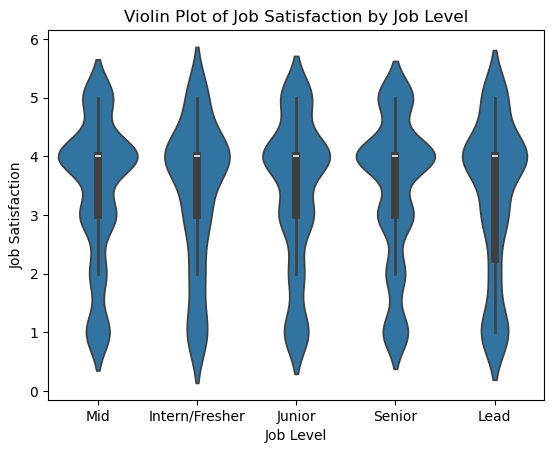

In [69]:
sns.violinplot(x='JobLevel', y='JobSatisfaction', data=dataset)


plt.title('Violin Plot of Job Satisfaction by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Job Satisfaction')

plt.show()

In [63]:
numerical_col = ['Age', 'Experience', 'WLB', 'WorkEnv', 'SleepHours', 
                     'CommuteDistance', 'NumCompanies', 'TeamSize', 
                     'TrainingHoursPerYear', 'JobSatisfaction']


In [64]:
corr_matrix=dataset[numerical_col].corr()

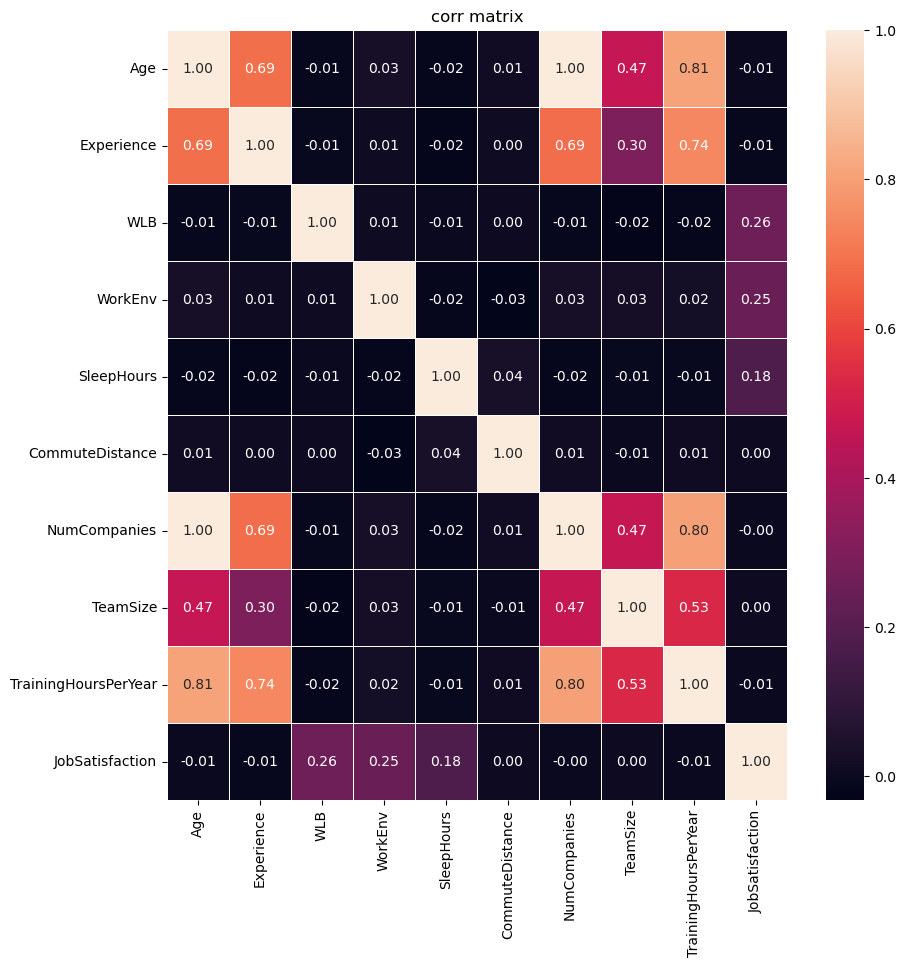

In [67]:
#create heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidth=0.5)
plt.title('corr matrix')
plt.show()

In [80]:
#train and test split
x =dataset[['Age', 'Experience', 'WLB', 'WorkEnv', 'SleepHours', 
            'CommuteDistance', 'NumCompanies', 'TeamSize', 'TrainingHoursPerYear']]
y=dataset['JobSatisfaction']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2420, 9)
x test:  (605, 9)
y train:  (2420,)
y test:  (605,)


In [85]:
# Initialize the model
model = LinearRegression()

# Train 
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

In [86]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.04296388 -0.00203983  0.22887049  0.24063867  0.20526476  0.00042419
  0.13210524  0.0003698   0.0002674 ]
Intercept: 1.4840217553233743


In [89]:
#mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print('mean squared error:',mse)

mean squared error: 1.457974187381888


In [90]:
error=y_test-y_pred
print(error)

331     0.724156
1866    1.640640
2606   -1.079862
1299   -2.215921
1091   -2.079909
          ...   
2582   -0.774857
1798    2.274643
2428   -0.451946
857    -0.351892
7       2.408781
Name: JobSatisfaction, Length: 605, dtype: float64


<Axes: ylabel='JobSatisfaction'>

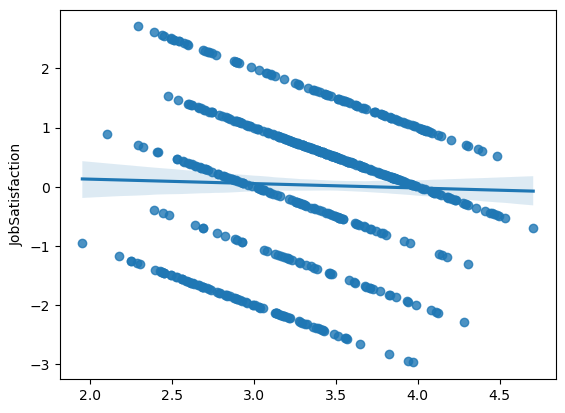

In [91]:
sns.regplot(x=y_pred,y=error,data=dataset)